In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

% matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

def test_stationarity(timeseries):
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    #Graph
    plt.plot(list(timeseries))
    plt.show()

In [3]:
def diff_series(timeseries):
    diff_s = timeseries - timeseries.shift()
    return(diff_s[1:])

In [99]:
df_us = pd.read_excel('Data.xlsx', sheetname='US_USData')

In [100]:
df_us = df_us[['Year', 'Qrt', 'y', 'p', 'r', 'u', 'c', 'Oil.price']].copy()

In [101]:
df_us = df_us.iloc[84:268, :].copy()

In [102]:
df_us = df_us.reset_index()

In [103]:
df_us.head()

,index,Year,Qrt,y,p,r,u,c,Oil.price
0,85,1967,1,8.272673,-1.566091,0.048174,0.038229,0.881495,1.095273
1,86,1967,2,8.272877,-1.560791,0.039895,0.038194,0.866086,1.098612
2,87,1967,3,8.280838,-1.551028,0.038923,0.037971,0.860431,1.114158
3,88,1967,4,8.288434,-1.540005,0.041738,0.039285,0.871866,1.121678
4,89,1968,1,8.308815,-1.529149,0.047884,0.037388,0.873369,1.121678


Results of Dickey-Fuller Test:
Test Statistic                -6.607217e+00
p-value                        6.511005e-09
#Lags Used                     1.000000e+00
Number of Observations Used    1.810000e+02
Critical Value (1%)           -3.467005e+00
Critical Value (5%)           -2.877644e+00
Critical Value (10%)          -2.575355e+00
dtype: float64


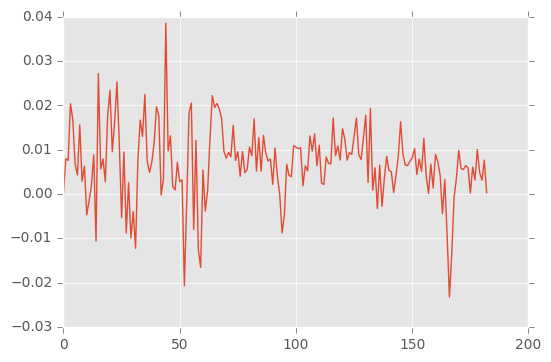

In [105]:
test_stationarity(diff_series(df_us['y']))

Results of Dickey-Fuller Test:
Test Statistic                  -2.002922
p-value                          0.285293
#Lags Used                       4.000000
Number of Observations Used    178.000000
Critical Value (1%)             -3.467632
Critical Value (5%)             -2.877918
Critical Value (10%)            -2.575501
dtype: float64


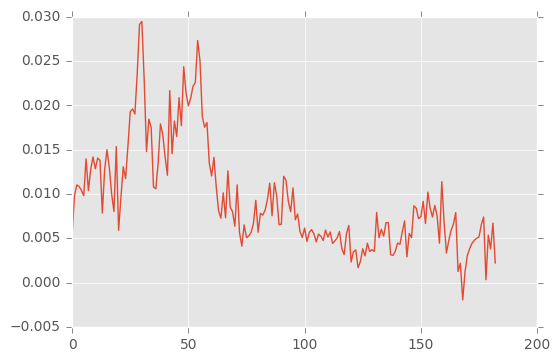

In [106]:
test_stationarity(diff_series(df_us['p']))

Results of Dickey-Fuller Test:
Test Statistic                -5.927019e+00
p-value                        2.430149e-07
#Lags Used                     6.000000e+00
Number of Observations Used    1.760000e+02
Critical Value (1%)           -3.468062e+00
Critical Value (5%)           -2.878106e+00
Critical Value (10%)          -2.575602e+00
dtype: float64


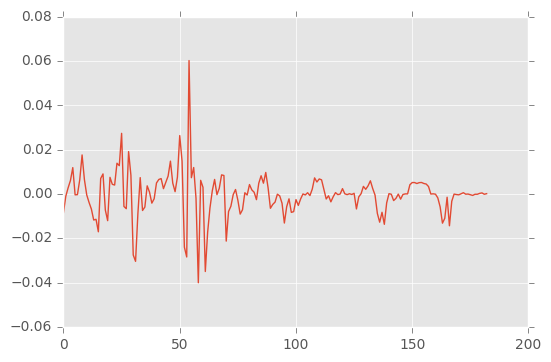

In [107]:
test_stationarity(diff_series(df_us['r']))

Results of Dickey-Fuller Test:
Test Statistic                  -5.112497
p-value                          0.000013
#Lags Used                      11.000000
Number of Observations Used    171.000000
Critical Value (1%)             -3.469181
Critical Value (5%)             -2.878595
Critical Value (10%)            -2.575863
dtype: float64


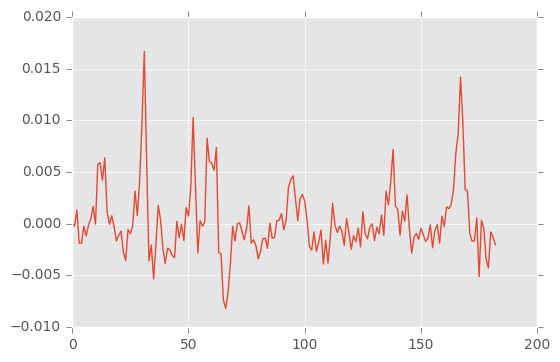

In [108]:
test_stationarity(diff_series(df_us['u']))

Results of Dickey-Fuller Test:
Test Statistic                -6.045358e+00
p-value                        1.315849e-07
#Lags Used                     1.100000e+01
Number of Observations Used    1.710000e+02
Critical Value (1%)           -3.469181e+00
Critical Value (5%)           -2.878595e+00
Critical Value (10%)          -2.575863e+00
dtype: float64


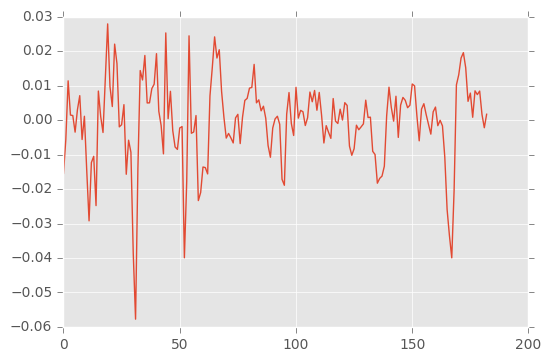

In [109]:
test_stationarity(diff_series(df_us['c']))

Results of Dickey-Fuller Test:
Test Statistic                -9.969637e+00
p-value                        2.258298e-17
#Lags Used                     1.000000e+00
Number of Observations Used    1.810000e+02
Critical Value (1%)           -3.467005e+00
Critical Value (5%)           -2.877644e+00
Critical Value (10%)          -2.575355e+00
dtype: float64


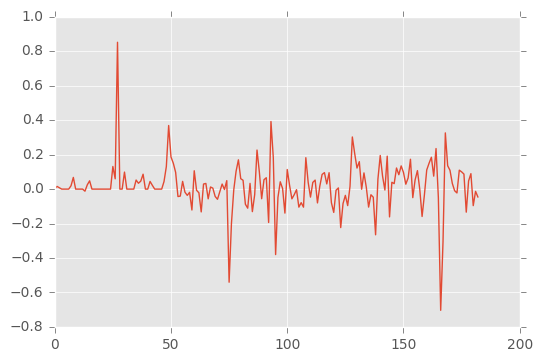

In [110]:
test_stationarity(diff_series(df_us['Oil.price']))

In [112]:
diff_df = np.array(pd.DataFrame([diff_series(df_us['y']),
diff_series(df_us['p']),
diff_series(df_us['r']),
diff_series(df_us['u']),
diff_series(df_us['c']),
diff_series(df_us['Oil.price'])]).T)

---

In [113]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [134]:
len(diff_df[:178]), len(diff_df[:])

(178, 183)

In [135]:
model = VAR(diff_df[:178])

In [ ]:
model

In [136]:
model.select_order()

                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0        -55.02       -54.91    1.273e-24       -54.97
1        -57.30      -56.50*    1.307e-25      -56.97*
2        -57.44       -55.97    1.130e-25       -56.85
3        -57.48       -55.32    1.099e-25       -56.60
4        -57.54       -54.70    1.042e-25       -56.39
5        -57.59       -54.07   1.005e-25*       -56.16
6        -57.39       -53.20    1.243e-25       -55.69
7        -57.34       -52.46    1.351e-25       -55.36
8        -57.36       -51.81    1.368e-25       -55.11
9        -57.38       -51.15    1.408e-25       -54.85
10       -57.61       -50.69    1.197e-25       -54.80
11       -57.60       -50.00    1.306e-25       -54.52
12       -57.64       -49.36    1.387e-25       -54.28
13       -57.89       -48.93    1.213e-25       -54.26
14      -58.17*       -48.53    1.066e-25       -54.26
* Minimum


{'aic': 14, 'bic': 1, 'fpe': 5, 'hqic': 1}

In [317]:
fit = model.fit(maxlags=2)

In [318]:
fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 16, Apr, 2017
Time:                     11:51:57
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -56.1453
Nobs:                     176.000    HQIC:                  -56.9804
Log likelihood:           3644.03    FPE:                1.01602e-25
AIC:                     -57.5504    Det(Omega_mle):     6.62533e-26
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.004545         0.001479            3.073           0.002
L1.y1        -0.007321         0.101546           -0.072           0.943
L1.y2        -0.017198         0.206982           -0.083           0.934
L1.y3        -0.068617

In [319]:
forc = fit.forecast(y=diff_df[:178], steps=5)

In [320]:
pd.DataFrame(forc)

,0,1,2,3,4,5
0,0.008458,0.007148,-0.002318,0.000008,0.004357,-0.007528
1,0.006071,0.006950,-0.001142,0.000284,0.000884,0.056937
2,0.007107,0.007198,-0.000125,-0.000070,0.001304,0.019818
3,0.006775,0.007486,-0.000323,0.000086,0.000897,0.009478
4,0.006842,0.007573,-0.000806,0.000125,0.000432,0.013382


In [321]:
fit.resid[:, 0:]

array([[ -1.66340995e-03,   2.81962056e-03,   1.58290266e-03,
          1.05657903e-03,   1.34777707e-02,   1.08027516e-02],
       [  1.06896909e-02,   1.27296630e-03,   7.94773377e-03,
         -1.72882474e-03,  -3.72737573e-03,  -4.31237873e-02],
       [  1.13447579e-02,  -1.39951081e-03,   7.05659080e-03,
         -1.26922481e-03,   2.24472777e-03,  -3.04138818e-02],
       ..., 
       [ -4.10970910e-03,   2.42572330e-05,   1.29764506e-03,
         -5.46972615e-03,   6.81610627e-03,   5.62954163e-02],
       [ -3.80766951e-03,  -9.41472729e-04,  -3.91129690e-03,
          2.29474183e-03,  -7.27050275e-03,   5.36203709e-02],
       [ -1.19340144e-04,   1.71750953e-03,   2.26752945e-03,
         -1.58141460e-03,   1.28580855e-02,  -1.46224624e-01]])

In [338]:
def plot_compar(real, forcast):
    plt.plot(real, color='red')
    plt.plot(forcast, color='blue')
    plt.show()

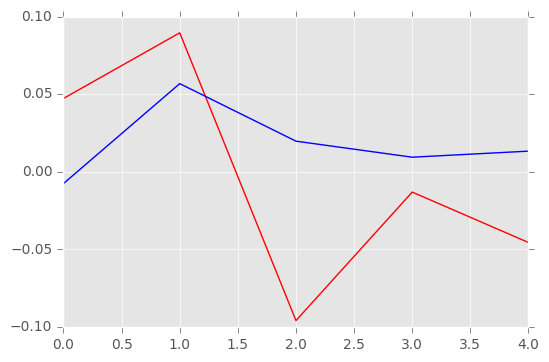

In [344]:
l = 5
plot_compar(diff_df[178:][:,l], forc[:,l])

In [346]:
pd.DataFrame(fit.resid)

,0,1,2,3,4,5
0,-0.001663,0.002820,0.001583,0.001057,0.013478,0.010803
1,0.010690,0.001273,0.007948,-0.001729,-0.003727,-0.043124
2,0.011345,-0.001400,0.007057,-0.001269,0.002245,-0.030414
3,-0.003469,-0.001206,-0.004025,0.001636,-0.004340,-0.005560
4,-0.002279,0.003869,0.002169,-0.001004,0.005744,-0.011412
5,0.006180,-0.002027,0.005713,0.000105,0.005902,-0.008897
6,-0.004480,0.001865,0.015584,0.000672,-0.006904,0.010426
7,0.002504,0.001233,0.005832,0.000509,0.007828,-0.018336
8,-0.005720,-0.000784,0.005409,-0.002481,-0.008020,-0.069406
9,-0.004430,-0.000032,-0.002477,0.003642,-0.020030,-0.020921


In [347]:
def assemble_model(n_feat):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_feat, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(n_feat, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

In [355]:
train_x = fit.resid[:-1, :]
train_y = fit.resid[1:, :]

In [368]:
train_x = diff_df[:-1, :]
train_y = diff_df[1:, :]

In [369]:
nn = assemble_model(6)

In [370]:
nn.fit(train_x, 
       train_y, 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.4562
Epoch 2/100
0s - loss: 0.1821
Epoch 3/100
0s - loss: 0.0705
Epoch 4/100
0s - loss: 0.0257
Epoch 5/100
0s - loss: 0.0095
Epoch 6/100
0s - loss: 0.0047
Epoch 7/100
0s - loss: 0.0036
Epoch 8/100
0s - loss: 0.0033
Epoch 9/100
0s - loss: 0.0033
Epoch 10/100
0s - loss: 0.0033
Epoch 11/100
0s - loss: 0.0033
Epoch 12/100
0s - loss: 0.0033
Epoch 13/100
0s - loss: 0.0033
Epoch 14/100
0s - loss: 0.0033
Epoch 15/100
0s - loss: 0.0033
Epoch 16/100
0s - loss: 0.0033
Epoch 17/100
0s - loss: 0.0033
Epoch 18/100
0s - loss: 0.0033
Epoch 19/100
0s - loss: 0.0033
Epoch 20/100
0s - loss: 0.0033
Epoch 21/100
0s - loss: 0.0033
Epoch 22/100
0s - loss: 0.0033
Epoch 23/100
0s - loss: 0.0033
Epoch 24/100
0s - loss: 0.0033
Epoch 25/100
0s - loss: 0.0033
Epoch 26/100
0s - loss: 0.0033
Epoch 27/100
0s - loss: 0.0033
Epoch 28/100
0s - loss: 0.0033
Epoch 29/100
0s - loss: 0.0033
Epoch 30/100
0s - loss: 0.0033
Epoch 31/100
0s - loss: 0.0033
Epoch 32/100
0s - loss: 0.0034
Epoch 33/100
0s -

In [371]:
nn.predict(fit.resid[-1:, :])

array([[ 0.0077628 ,  0.00949033, -0.0023022 ,  0.00543232, -0.00106695,
         0.00483311]], dtype=float32)

In [ ]:
def nn_predict_var(nn_model, data, lags_to_predict):
    
    
    lags = len(last_obs.columns)
    predicted_obs = np.array(last_obs)[0].tolist() # list
    obs = np.array([predicted_obs]) # np.array
    for i in range(lags_to_predict):
        predicted_obs.append(nn_model.predict(obs)[0][0])
        obs = np.array([predicted_obs[-lags:]]) # np.array
    return(predicted_obs[lags:])

In [4]:
df = pd.read_excel('Irek_Board_diversity.xlsx', sheetname='for Andrey')

In [5]:
df = df.iloc[:, :24].copy()
df = df.iloc[:2049, :].copy()

In [6]:
for i in range(1,23):
    df['key' + str(i)] = [np.nan]*len(df)

In [7]:
for i in range(1,23):
    df['degree' + str(i)] = [np.nan]*len(df)

In [8]:
for i in range(1,23):
    print('"BoardMember'+str(i)+'"', end=',')
    print('"key'+str(i)+'"', end=',')
    print('"degree'+str(i)+'"', end=',')

"BoardMember1","key1","degree1","BoardMember2","key2","degree2","BoardMember3","key3","degree3","BoardMember4","key4","degree4","BoardMember5","key5","degree5","BoardMember6","key6","degree6","BoardMember7","key7","degree7","BoardMember8","key8","degree8","BoardMember9","key9","degree9","BoardMember10","key10","degree10","BoardMember11","key11","degree11","BoardMember12","key12","degree12","BoardMember13","key13","degree13","BoardMember14","key14","degree14","BoardMember15","key15","degree15","BoardMember16","key16","degree16","BoardMember17","key17","degree17","BoardMember18","key18","degree18","BoardMember19","key19","degree19","BoardMember20","key20","degree20","BoardMember21","key21","degree21","BoardMember22","key22","degree22",

In [9]:
df = df[["company", "ticker", "BoardMember1","key1","degree1","BoardMember2","key2","degree2","BoardMember3",
         "key3","degree3","BoardMember4","key4","degree4","BoardMember5","key5","degree5","BoardMember6","key6",
         "degree6","BoardMember7","key7","degree7","BoardMember8","key8","degree8","BoardMember9","key9",
         "degree9","BoardMember10","key10","degree10","BoardMember11","key11","degree11","BoardMember12","key12",
         "degree12","BoardMember13","key13","degree13","BoardMember14","key14","degree14","BoardMember15","key15",
         "degree15","BoardMember16","key16","degree16","BoardMember17","key17","degree17","BoardMember18","key18",
         "degree18","BoardMember19","key19","degree19","BoardMember20","key20","degree20","BoardMember21","key21",
         "degree21","BoardMember22","key22","degree22"]].copy()

In [12]:
bachelor = ['BA', 'bachelor', 'undergraduate', 'Bsc', 'B.Sc', 'B.S.', 'B.s', 
            'A.B.', 'BS', 'AB', 'Bachelor', 'Undergraduate', 'B.A']
master_art = ['MA', 'M.A.', 'Master of arts']
master_science = ['MS', 'M.S.', 'Msc', 'M.Sc', 'M.Sc.', 'Master of science']
master = ['master', 'Master']
mba = ['MBA', 'M.B.A.', "master's in business administration", 
       'master of business administration', 'master in business administration']
phd = ['PHD', 'Ph.d.', 'Doctor', 'M.D.', 'Ph.D', 'phd', 'Ph. D', 'doctor']

full = bachelor + master_art + master_science + mba + phd + master

In [13]:
for j in range(len(df)):
    for i in range(1,23):
        if pd.isnull(df.loc[j, 'BoardMember'+str(i)]):
            pass
        else:
            str_word = ''
            for word in full:
                if word in df.loc[j, 'BoardMember' + str(i)]:
                    str_word = str_word + ' ' + word
                    #print(str_word, i,j)
            df.loc[j, 'key' + str(i)] = str_word

In [14]:
for j in range(len(df)):
    for i in range(1,23):
        if pd.isnull(df.loc[j, 'key'+str(i)]):
            pass
        else:
            str_word = ''
            for word in bachelor:
                if word in df.loc[j, 'key' + str(i)]:
                    str_word = str_word + ' ' + 'bachelor'
                    break
            for word in master_art:
                if word in df.loc[j, 'key' + str(i)]:
                    str_word = str_word + ' ' + 'master_art'
                    break
            for word in master_science:
                if word in df.loc[j, 'key' + str(i)]:
                    str_word = str_word + ' ' + 'master_science'
                    break
            for word in mba:
                if word in df.loc[j, 'key' + str(i)]:
                    str_word = str_word + ' ' + 'mba'
                    break
            for word in phd:
                if word in df.loc[j, 'key' + str(i)]:
                    str_word = str_word + ' ' + 'phd'
                    break
            for word in master:
                if word in df.loc[j, 'key' + str(i)]:
                    str_word = str_word + ' ' + 'master'
                    break
            df.loc[j, 'degree' + str(i)] = str_word

In [15]:
df.to_csv('Irek.csv')